In [2]:
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
import jp_mpl as jplot
sys.path.append('/home/jp/projects/icecube/oscFit_Tania/modules')
import pickle, dataLoader
import numpy as np
from copy import deepcopy
reload(dataLoader)
import oscFit
reload(oscFit)

<module 'oscFit' from '/home/jp/projects/icecube/oscFit_Tania/modules/oscFit.pyc'>

In [3]:
true_axis = [[0.0, 10.],
             [10., 20.],
             [20., 40.],
             [40., np.inf]]
bin_edges = [10**np.linspace(0.8, 1.75, 11),
             np.arccos(np.linspace(-1,0.,9))[::-1]]

In [4]:
loader_data =  dataLoader.dataLoader(observables = 
                                ['reco_energy', 'reco_zenith'],# 'reco_energy'],
                                bin_edges   = deepcopy(bin_edges),
                                user = 'quickstart', 
                                LEaxis = [],      
                                weight_keys = ['weight_e', 'weight_mu', 'weight_mu_pi'],
                                detsys_nuspecs = {'domeff': [1., 1],
                                                  'hole_ice': [0.02, 2]},
                                detsys_muspecs = {'domeff': [1.0, -1]},
                                table_nbins = False,
                                use_kde_bg  = False,
                                use_kde_sys = False,
                                detsys_redo = True,
                                verbose = False)


 ************************************ 
 **** oscFit3D v1.1 - dataLoader ****
 ************************************

dataLoader: Initializing user quickstart
dataLoader: Dummy observable(s) created to use 3D histograms
dataLoader: MC loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Generating new systematic histograms
dataLoader: Requesting hole_ice nu systematic which is not defined in user. Removing.
dataLoader: Requesting domeff nu systematic which is not defined in user. Removing.
dataLoader: Done loading systematic variations
dataLoader: Systematic functions for atmmu  -  domeff
dataLoader: Combining systematics for  nue
dataLoader: Not building systematic functions for nue
dataLoader: Combining systematics for  numu
dataLoader: Not building systematic functions for numu
dataLoader: Combining systematics for  nutau
dataLoader: Not building systematic functions for nutau
dataLoader

In [5]:
data_settings = {  'dm31':                     0.0025, 
                   'theta23':                  0.78,
                   'theta13':                  0.155,
                   'norm_nu':                  2.6, # In years!
                   'norm_e':                   1.,
                   'domeff':                   1., 
                   'norm_noise':               0.,
                   'norm_atmmu':               0.1,
                   #'atmmu_f':                  0.05,
                   'nu_pi_scale':              1.,
                   'hole_ice':                 0.02, 
                   'atmmu_template':           'data',
                   'simulation':               'baseline', 
                   'oscTables':                False,
                   'oscMode':                  'Vacuum',  
                   'ma_variations':            True,   
                   'add_detector_systematics': False}


In [6]:
data = loader_data.loadMCasData(data_settings,
                                     statistical_fluctuations=False)

dataLoader: atmmu_norm  0.1 , noise_norm 0.0


In [7]:
loader_bkg =  dataLoader.dataLoader(observables = 
                                ['reco_energy', 'reco_zenith'],
                                bin_edges   =  deepcopy(bin_edges),
                                user = 'quickstart_onlybkg', 
                                LEaxis = [],      
                                weight_keys = ['weight_e', 'weight_mu', 'weight_mu_pi'],
                                detsys_nuspecs = {'domeff': [1., 1],
                                                  'hole_ice': [0.02, 2]},
                                detsys_muspecs = {'domeff': [1.0, -1]},
                                table_nbins = False,
                                use_kde_bg  = False,
                                use_kde_sys = False,
                                detsys_redo = True,
                                verbose = False)


 ************************************ 
 **** oscFit3D v1.1 - dataLoader ****
 ************************************

dataLoader: Initializing user quickstart_onlybkg
dataLoader: Dummy observable(s) created to use 3D histograms
dataLoader: MC loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Generating new systematic histograms
dataLoader: Requesting hole_ice nu systematic which is not defined in user. Removing.
dataLoader: Requesting domeff nu systematic which is not defined in user. Removing.
dataLoader: Done loading systematic variations
dataLoader: Systematic functions for atmmu  -  domeff
dataLoader: Combining systematics for  nue
dataLoader: Not building systematic functions for nue
dataLoader: Combining systematics for  numu
dataLoader: Not building systematic functions for numu
dataLoader: Combining systematics for  nutau
dataLoader: Not building systematic functions for nutau
da

In [8]:
loader_one =  dataLoader.dataLoader(observables = 
                                ['reco_energy', 'reco_zenith'],# 'reco_energy'],
                                bin_edges   = deepcopy(bin_edges),
                                user = 'quickstart_nobkg', 
                                LEaxis = [],      
                                weight_keys = ['weight_e', 'weight_mu', 'weight_mu_pi'],
                                detsys_nuspecs = {'domeff': [1., 1],
                                                  'hole_ice': [0.02, 2]},
                                detsys_muspecs = {'domeff': [1.0, -1]},
                                extra_cuts = {'energy':true_axis[0]},
                                table_nbins = False,
                                use_kde_bg  = False,
                                use_kde_sys = False,
                                detsys_redo = True,
                                verbose = False)


 ************************************ 
 **** oscFit3D v1.1 - dataLoader ****
 ************************************

dataLoader: Initializing user quickstart_nobkg
dataLoader: Dummy observable(s) created to use 3D histograms
dataLoader: MC loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Generating new systematic histograms
dataLoader: Requesting hole_ice nu systematic which is not defined in user. Removing.
dataLoader: Requesting domeff nu systematic which is not defined in user. Removing.
dataLoader: Requesting domeff mu systematic which is not defined in user. Removing.
dataLoader: No MC for atmospheric muons
dataLoader: Done loading systematic variations
dataLoader: Combining systematics for  nue
dataLoader: Not building systematic functions for nue
dataLoader: Combining systematics for  numu
dataLoader: Not building systematic functions for numu
dataLoader: Combining systematics f

In [9]:
from copy import deepcopy
loader_dict = deepcopy(loader_one.iniDict)
loader_dict['extra_cuts']['energy'] =true_axis[1]

In [10]:
loader_two =  dataLoader.dataLoader(**loader_dict)


 ************************************ 
 **** oscFit3D v1.1 - dataLoader ****
 ************************************

dataLoader: Initializing user quickstart_nobkg
dataLoader: Dummy observable(s) created to use 3D histograms
dataLoader: MC loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Generating new systematic histograms
dataLoader: Requesting hole_ice nu systematic which is not defined in user. Removing.
dataLoader: Requesting domeff nu systematic which is not defined in user. Removing.
dataLoader: Requesting domeff mu systematic which is not defined in user. Removing.
dataLoader: No MC for atmospheric muons
dataLoader: Done loading systematic variations
dataLoader: Combining systematics for  nue
dataLoader: Not building systematic functions for nue
dataLoader: Combining systematics for  numu
dataLoader: Not building systematic functions for numu
dataLoader: Combining systematics f

In [11]:
loader_dict = deepcopy(loader_one.iniDict)
loader_dict['extra_cuts']['energy'] =true_axis[2]

In [12]:
loader_three =  dataLoader.dataLoader(**loader_dict)


 ************************************ 
 **** oscFit3D v1.1 - dataLoader ****
 ************************************

dataLoader: Initializing user quickstart_nobkg
dataLoader: Dummy observable(s) created to use 3D histograms
dataLoader: MC loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Generating new systematic histograms
dataLoader: Requesting hole_ice nu systematic which is not defined in user. Removing.
dataLoader: Requesting domeff nu systematic which is not defined in user. Removing.
dataLoader: Requesting domeff mu systematic which is not defined in user. Removing.
dataLoader: No MC for atmospheric muons
dataLoader: Done loading systematic variations
dataLoader: Combining systematics for  nue
dataLoader: Not building systematic functions for nue
dataLoader: Combining systematics for  numu
dataLoader: Not building systematic functions for numu
dataLoader: Combining systematics f

In [13]:
loader_dict = deepcopy(loader_one.iniDict)
loader_dict['extra_cuts']['energy'] =true_axis[3]
loader_four =  dataLoader.dataLoader(**loader_dict)


 ************************************ 
 **** oscFit3D v1.1 - dataLoader ****
 ************************************

dataLoader: Initializing user quickstart_nobkg
dataLoader: Dummy observable(s) created to use 3D histograms
dataLoader: MC loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Muon background templates loaded successfully!
dataLoader: Generating new systematic histograms
dataLoader: Requesting hole_ice nu systematic which is not defined in user. Removing.
dataLoader: Requesting domeff nu systematic which is not defined in user. Removing.
dataLoader: Requesting domeff mu systematic which is not defined in user. Removing.
dataLoader: No MC for atmospheric muons
dataLoader: Done loading systematic variations
dataLoader: Combining systematics for  nue
dataLoader: Not building systematic functions for nue
dataLoader: Combining systematics for  numu
dataLoader: Not building systematic functions for numu
dataLoader: Combining systematics f

(2184.0, 2184.0)

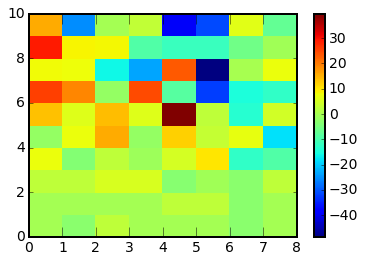

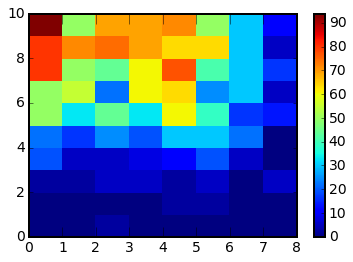

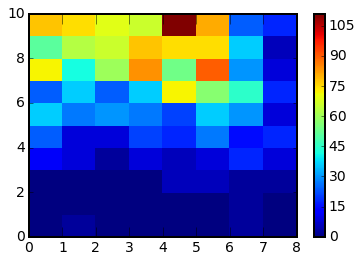

In [14]:
plt.pcolor((loader_bkg.atmmu_histo['data_aux'] -loader_bkg.atmmu_histo['data'])[:,:,0])
plt.colorbar()
plt.figure()
plt.pcolor((loader_bkg.atmmu_histo['data_aux'])[:,:,0])
plt.colorbar()
plt.figure()
plt.pcolor((loader_bkg.atmmu_histo['data'])[:,:,0])
plt.colorbar()

np.sum(loader_bkg.atmmu_histo['data_aux']), np.sum(loader_bkg.atmmu_histo['data'])

In [15]:
data_h1 = loader_one.loadMCasData(data_settings,
                                     statistical_fluctuations=False)

dataLoader: atmmu_norm  0.1 , noise_norm 0.0


In [16]:
data_h1

array([[[  8.738e+00],
        [  1.124e+01],
        [  1.289e+01],
        [  1.520e+01],
        [  1.906e+01],
        [  2.126e+01],
        [  2.825e+01],
        [  3.408e+01]],

       [[  1.424e+01],
        [  1.325e+01],
        [  1.803e+01],
        [  2.200e+01],
        [  2.486e+01],
        [  2.798e+01],
        [  3.264e+01],
        [  3.897e+01]],

       [[  1.521e+01],
        [  1.661e+01],
        [  1.897e+01],
        [  2.145e+01],
        [  2.535e+01],
        [  2.742e+01],
        [  2.892e+01],
        [  3.454e+01]],

       [[  1.163e+01],
        [  1.738e+01],
        [  1.324e+01],
        [  1.857e+01],
        [  1.802e+01],
        [  1.687e+01],
        [  1.900e+01],
        [  2.228e+01]],

       [[  8.428e+00],
        [  1.089e+01],
        [  7.732e+00],
        [  1.023e+01],
        [  8.813e+00],
        [  8.010e+00],
        [  7.621e+00],
        [  1.031e+01]],

       [[  3.483e+00],
        [  3.581e+00],
        [  2.764e+00],
 

In [17]:
data_h2 = loader_two.loadMCasData(data_settings,
                                     statistical_fluctuations=False)
print data_h2

dataLoader: atmmu_norm  0.1 , noise_norm 0.0
[[[  6.404]
  [  6.495]
  [  5.685]
  [  8.644]
  [  9.553]
  [ 14.453]
  [ 21.316]
  [ 28.76 ]]

 [[ 15.495]
  [ 17.735]
  [ 15.562]
  [ 17.964]
  [ 24.172]
  [ 27.033]
  [ 35.76 ]
  [ 51.979]]

 [[ 31.433]
  [ 36.342]
  [ 34.127]
  [ 33.693]
  [ 34.469]
  [ 43.164]
  [ 51.748]
  [ 75.984]]

 [[ 47.996]
  [ 52.283]
  [ 47.933]
  [ 46.096]
  [ 46.467]
  [ 48.119]
  [ 62.459]
  [ 85.005]]

 [[ 54.322]
  [ 63.637]
  [ 55.301]
  [ 50.143]
  [ 41.612]
  [ 45.159]
  [ 53.078]
  [ 82.032]]

 [[ 42.407]
  [ 47.04 ]
  [ 41.709]
  [ 35.467]
  [ 28.195]
  [ 23.074]
  [ 30.512]
  [ 48.052]]

 [[ 19.798]
  [ 17.72 ]
  [ 20.684]
  [ 14.548]
  [ 11.56 ]
  [  9.881]
  [ 13.005]
  [ 22.198]]

 [[  6.073]
  [  4.892]
  [  7.085]
  [  6.148]
  [  5.102]
  [  2.985]
  [  4.417]
  [  6.82 ]]

 [[  1.901]
  [  3.248]
  [  2.52 ]
  [  1.248]
  [  1.33 ]
  [  0.704]
  [  0.818]
  [  1.916]]

 [[  0.689]
  [  0.224]
  [  0.287]
  [  0.519]
  [  0.324]
  [  0.474]
 

In [18]:
data_h3 = loader_three.loadMCasData(data_settings,
                                     statistical_fluctuations=False)
print data_h3

dataLoader: atmmu_norm  0.1 , noise_norm 0.0
[[[   1.161]
  [   1.009]
  [   1.263]
  [   1.452]
  [   2.723]
  [   3.622]
  [   4.807]
  [   5.529]]

 [[   2.549]
  [   3.36 ]
  [   5.144]
  [   4.717]
  [   7.135]
  [   9.328]
  [  10.229]
  [  10.321]]

 [[   9.908]
  [  13.362]
  [  12.689]
  [  14.922]
  [  14.564]
  [  14.613]
  [  17.935]
  [  17.937]]

 [[  26.363]
  [  30.57 ]
  [  26.178]
  [  34.551]
  [  30.978]
  [  27.38 ]
  [  27.94 ]
  [  31.017]]

 [[  55.959]
  [  75.52 ]
  [  66.624]
  [  54.227]
  [  47.067]
  [  44.567]
  [  37.87 ]
  [  35.182]]

 [[  87.842]
  [ 102.275]
  [ 101.117]
  [  84.621]
  [  81.967]
  [  58.053]
  [  44.715]
  [  43.939]]

 [[ 108.085]
  [ 136.603]
  [ 119.606]
  [ 105.435]
  [  89.829]
  [  64.539]
  [  48.823]
  [  47.977]]

 [[  99.891]
  [ 113.64 ]
  [ 107.532]
  [  96.249]
  [  86.743]
  [  55.531]
  [  40.89 ]
  [  36.169]]

 [[  63.328]
  [  78.002]
  [  68.811]
  [  62.571]
  [  55.658]
  [  38.894]
  [  29.559]
  [  22.35 ]]

 

In [19]:
data_h4 = loader_four.loadMCasData(data_settings,
                                     statistical_fluctuations=False)
print data_h4

dataLoader: atmmu_norm  0.1 , noise_norm 0.0
[[[   0.316]
  [   0.418]
  [   0.32 ]
  [   0.652]
  [   1.16 ]
  [   0.683]
  [   1.16 ]
  [   1.682]]

 [[   0.799]
  [   1.32 ]
  [   0.607]
  [   1.945]
  [   2.333]
  [   2.602]
  [   2.142]
  [   1.837]]

 [[   2.565]
  [   2.327]
  [   3.292]
  [   3.925]
  [   4.469]
  [   5.021]
  [   5.276]
  [   5.639]]

 [[   4.44 ]
  [   6.515]
  [   7.623]
  [   8.029]
  [   8.137]
  [   8.924]
  [  10.351]
  [  11.331]]

 [[  12.945]
  [  15.589]
  [  16.692]
  [  16.722]
  [  18.223]
  [  16.504]
  [  14.709]
  [  15.121]]

 [[  29.91 ]
  [  30.647]
  [  31.342]
  [  32.923]
  [  34.505]
  [  28.86 ]
  [  29.578]
  [  34.796]]

 [[  46.979]
  [  61.759]
  [  62.44 ]
  [  58.983]
  [  58.653]
  [  48.772]
  [  44.664]
  [  47.161]]

 [[  85.661]
  [ 112.784]
  [ 106.6  ]
  [  99.493]
  [  97.964]
  [  76.521]
  [  72.725]
  [  73.012]]

 [[ 138.392]
  [ 164.347]
  [ 170.27 ]
  [ 156.906]
  [ 148.136]
  [ 117.083]
  [  98.308]
  [  95.881]]

 

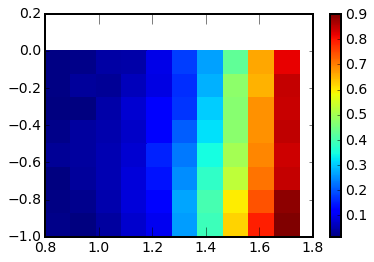

In [20]:
plt.pcolor(np.log10(loader_data.bin_edges[0]), np.cos(loader_data.bin_edges[1]),np.sum(data_h4/data,axis=2).T)
plt.colorbar()

0.0147089534152


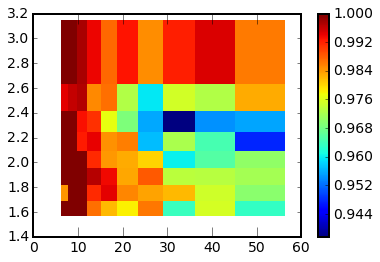

In [21]:
full_ratio = np.sum((data_h4+data_h3+data_h2+data_h1)/data,axis=2)
plt.pcolor(loader_data.bin_edges[0], loader_data.bin_edges[1],full_ratio.T)
plt.colorbar()
print full_ratio.std()

In [25]:
print np.sum(data_h1)/np.sum(data)
print np.sum(data_h2)/np.sum(data)
print np.sum(data_h3)/np.sum(data)
print np.sum(data_h4)/np.sum(data)


0.073344297908
0.191875768843
0.323914499152
0.390082108906


In [26]:
fit_settings  = {
    # Oscillations
    'simulation':     'baseline',
    'dm31':           [0.0025, False, 'NH'],
    'theta23':        [0.78, False], 
    'theta13':        [0.153, True],
    'mix_angle':      [0.95, False, 1.],
    'oscMode':        'TwoNeutrino',
    'oscTables':      False,
    'baseline_llh':   0.0,
    ### Sterile neutrinos - fixing all, if want to fit - specify explicitly
    'dm41':           [0.0, True],
    'theta24':        [0.0, True],
    'theta34':        [0.0, True],
    # Normalizations and flux
    'norm':           [1., True], # Set to False only for your final result. Saves time.
    'nu_frac1':         [0.07, False],
    'nu_frac2':         [0.2, False],
    'nu_frac3':         [0.3, False],
    #'nu_frac4':         [1., False],

    'norm_e':         [1., False],
    'norm_nc':        [1., False],
    'norm_tau':       [1., True], # Set to false for nutau apperance studies
    'gamma':          [0., True],  
    'nu_nubar':       [1., True],
    'nubar_ratio':     [0., False],
    'uphor_ratio':     [0., False],
    'nu_pi_scale':     [1., True],
    # Non-DIS cross sections
    'axm_qe':         [0., True],
    'axm_res':        [0., False],
    # Detector parameters
    'pid_bias':       [0., True], # Assumes a linear PID bias. Think carefully before you use it.
    'hole_ice':       [0.02, True], 
    'hi_fwd':         [0., True],     # Set to False only if you know what you are doing.
    'domeff':         [1., True],
    'had_escale':     [1., True],
    # Backgrounds
    'atmmu_f':        [0.01, False, 'data'],
    'noise_f':        [0.0, True],
    # Other details
    'detector_syst':  True,
    'include_priors': True, 
    'printMode':      -1, # Select 0,1,2,3 for the iminuit print_levels. Select -1 for every step.
    # Minimization
    'minimizer'     : "migrad", #used to be migrad 
    "octant"        : "B" , # B: both, L: left, R: right - A good fit should be run in both A and B.
    "llh_space"     : 'poisson',
    "blind_keys"    : [],
    "remove_blind_keys": True, # Sets the results from blind_keys to "BLIND", otherwise the results will be stored. 
    # False might be needed for studying difference between different years/sets, 
    # default is True - no keys from blind_keys will be printed and stored
    "fit_function": "chi_squared"
            }

In [34]:
reload(oscFit)
fitter = oscFit.fitOscParams()


 ************************************ 
 ****** oscFit3D v1.1 - oscFit ******
 ************************************



In [35]:
import iminuit

In [36]:
result, m = fitter(data_histograms=[data],
                data_loaders=[loader_one, loader_two, loader_three, loader_four, loader_bkg],
                fit_settings=fit_settings,
                ncalls = 1000,
                store_fit_details = True,
                return_minuit_object = True,
                evalOnly = False)


oscFit: Fitter running in TwoNeutrino mode
oscFit: 10508.4243259  events in data
oscFit: Fitting in normal hierarchy mode
oscFit: found octant in settings B
found octant constrain to theta23 as (0.0, 1.5707963267948966)
10.52850
oscFit: Testing the LLH function  10.5284976485
oscFit: Fit settings
	noise_f 	[0.0, True]
	pid_bias 	[0.0, True]
	octant 	B
	hi_fwd 	[0.0, True]
	blind_keys 	[]
	printMode 	-1
	oscMode 	TwoNeutrino
	include_priors 	True
	theta24 	[0.0, True]
	atmmu_f 	[0.01, False, 'data']
	dm31 	[0.0025, False, 'NH']
	theta23 	[0.78, True]
	nu_frac2 	[0.2, False]
	nu_frac3 	[0.3, False]
	remove_blind_keys 	True
	nu_frac1 	[0.07, False]
	uphor_ratio 	[0.0, False]
	oscTables 	False
	norm 	[1.0, True]
	axm_res 	[0.0, False]
	norm_tau 	[1.0, True]
	nubar_ratio 	[0.0, False]
	dm41 	[0.0, True]
	norm_nc 	[1.0, False]
	domeff 	[1.0, True]
	minimizer 	migrad
	hole_ice 	[0.02, True]
	nu_nubar 	[1.0, True]
	baseline_llh 	0.0
	had_escale 	[1.0, True]
	theta34 	[0.0, True]
	mix_angle 	[0

In [37]:
m.print_matrix()

+,dm31,mix_angle,nu_frac1,nu_frac2,nu_frac3,norm_e,nubar_ratio,uphor_ratio,atmmu_f,axm_res,norm_nc
dm31,1.00,0.11,0.04,-0.27,0.10,0.03,0.22,0.32,-0.04,-0.13,0.04
mix_angle,0.11,1.00,-0.25,0.04,-0.04,-0.00,0.23,0.52,0.06,0.05,0.04
nu_frac1,0.04,-0.25,1.00,-0.64,0.38,-0.01,-0.03,-0.08,0.18,0.02,-0.14
nu_frac2,-0.27,0.04,-0.64,1.00,-0.65,-0.00,-0.11,-0.14,0.33,0.04,-0.15
nu_frac3,0.10,-0.04,0.38,-0.65,1.00,-0.01,0.12,0.08,-0.08,0.03,-0.19
norm_e,0.03,-0.00,-0.01,-0.00,-0.01,1.00,0.00,0.03,-0.01,0.01,-0.01
nubar_ratio,0.22,0.23,-0.03,-0.11,0.12,0.00,1.00,-0.31,-0.03,0.00,0.02
uphor_ratio,0.32,0.52,-0.08,-0.14,0.08,0.03,-0.31,1.00,0.00,-0.05,0.10
atmmu_f,-0.04,0.06,0.18,0.33,-0.08,-0.01,-0.03,0.00,1.00,0.03,-0.04
axm_res,-0.13,0.05,0.02,0.04,0.03,0.01,0.00,-0.05,0.03,1.00,0.03
